# #Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1.	Pre-process the dataset.
2.	Identify outliers.
3.	Check the correlation.
4.	Implement linear regression and random forest regression models.
5.	Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
df  = pd.read_csv("uber.csv")

##  1.	Pre-process the dataset.

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35725 non-null  int64  
 1   key                35725 non-null  object 
 2   fare_amount        35725 non-null  float64
 3   pickup_datetime    35725 non-null  object 
 4   pickup_longitude   35724 non-null  float64
 5   pickup_latitude    35724 non-null  float64
 6   dropoff_longitude  35724 non-null  float64
 7   dropoff_latitude   35724 non-null  float64
 8   passenger_count    35724 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.5+ MB


In [ ]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.shape #To get the total (Rows,Columns)

(35725, 7)

In [ ]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        35725 non-null  float64
 1   pickup_datetime    35725 non-null  object 
 2   pickup_longitude   35724 non-null  float64
 3   pickup_latitude    35724 non-null  float64
 4   dropoff_longitude  35724 non-null  float64
 5   dropoff_latitude   35724 non-null  float64
 6   passenger_count    35724 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.9+ MB


In [ ]:
df.describe() #To get statistics of each columns 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,35725.000000,35724.000000,35724.000000,35724.000000,35724.000000,35724.000000
mean,11.394681,-72.561212,39.942645,-72.572503,39.943957,1.677024
std,10.085005,10.911110,6.047059,10.852786,6.043435,1.294493
min,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,6.000000,-73.992033,40.734753,-73.991475,40.733846,1.000000
50%,8.500000,-73.981821,40.752563,-73.980170,40.752855,1.000000
75%,12.900000,-73.967196,40.767152,-73.963545,40.768076,2.000000
max,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000


### Filling Missing values

In [ ]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [74]:
# passengger_count has null value so replace it with mean or median value
df['passenger_count'].fillna(value=df['passenger_count'].mean(),inplace = True)
df['pickup_longitude'].fillna(value=df['pickup_longitude'].mean(),inplace = True)
df['pickup_latitude'].fillna(value=df['pickup_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace = True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)




In [75]:
df.isnull().sum() 

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [76]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

## Checking outliers and filling them 

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

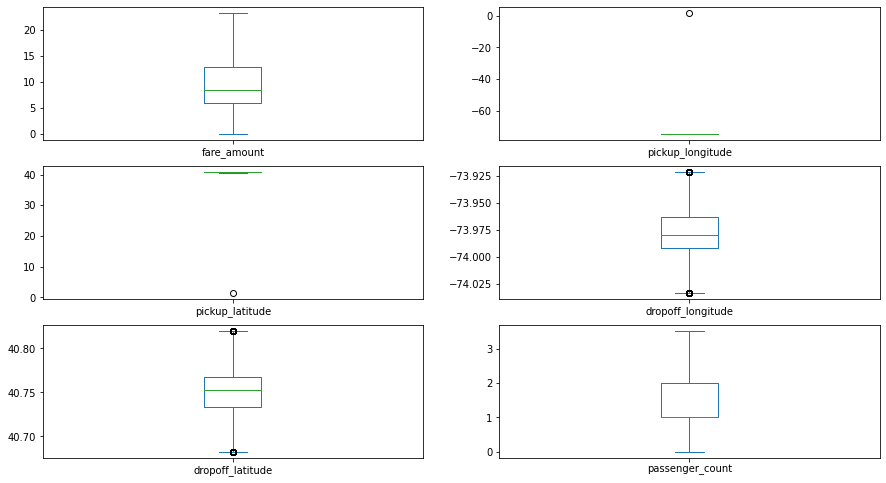

In [78]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [79]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
    
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1
 

    

In [80]:
 
df = treat_outliers_all(df , df.iloc[: , 0::])


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

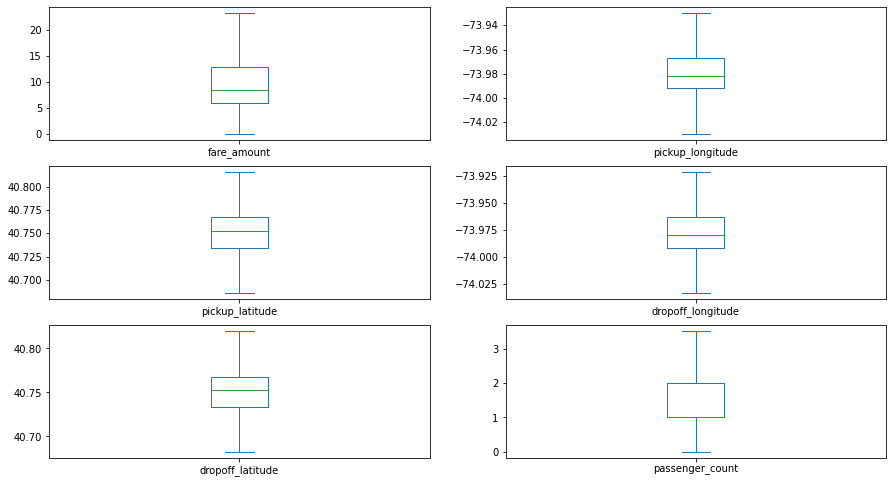

In [81]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [82]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.929941,40.744085,-73.973082,40.761247,3.5


In [83]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

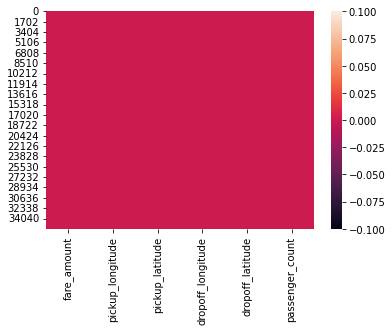

In [84]:
sns.heatmap(df.isnull()) #Free for null values

In [85]:
corr = df.corr() #Function to find the correlation

In [86]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.167049,-0.114343,0.228189,-0.133700,0.018673
pickup_longitude,0.167049,1.000000,0.268243,0.428222,0.083235,-0.007946
pickup_latitude,-0.114343,0.268243,1.000000,0.053571,0.520707,-0.011390
dropoff_longitude,0.228189,0.428222,0.053571,1.000000,0.249985,-0.005916
dropoff_latitude,-0.133700,0.083235,0.520707,0.249985,1.000000,-0.007331
passenger_count,0.018673,-0.007946,-0.011390,-0.005916,-0.007331,1.000000


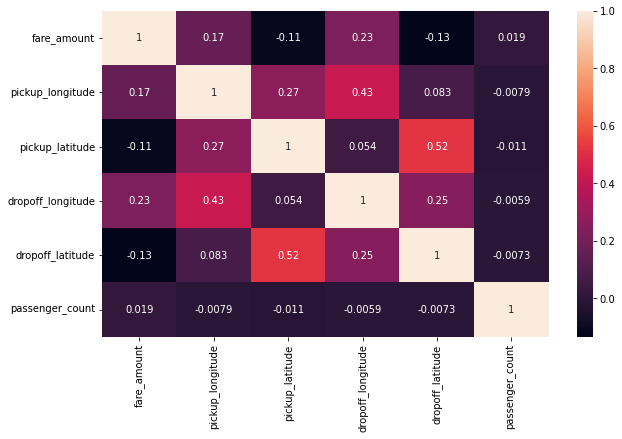

In [87]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### Dividing the dataset into feature and target values 

In [88]:
df.isnull().sum() 

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [89]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [ ]:
#y = df['fare_amount']

### Dividing the dataset into training and testing dataset

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [91]:
X_train

array([[  6.9      , -73.976309 ,  40.755542 , -73.999377 ,  40.76129  ],
       [  6.       , -73.962055 ,  40.776427 , -73.952213 ,  40.787342 ],
       [ 18.5      , -74.002847 ,  40.723358 , -73.975907 ,  40.75785  ],
       ...,
       [ 11.5      , -73.951395 ,  40.770132 , -73.976775 ,  40.78026  ],
       [ 10.5      , -73.971915 ,  40.757187 , -73.992037 ,  40.74269  ],
       [ 23.25     , -73.9299405,  40.77417  , -73.979281 ,  40.762337 ]])

### Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [93]:
regression.fit(X_train,y_train)

LinearRegression()

In [94]:
regression.intercept_ #To find the linear intercept

-36.99163580975869

In [95]:
regression.coef_ #To find the linear coeeficient

array([ 0.00279521, -0.42759057, -0.27323316, -0.26854322, -0.04632836])

In [96]:
prediction = regression.predict(X_test) #To predict the target values

In [97]:
print(prediction)

[1.5097912  1.48907533 1.47874357 ... 1.52928663 1.49801616 1.51254106]


In [98]:
y_test

array([1., 1., 1., ..., 1., 1., 1.])

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [113]:
from sklearn.metrics import r2_score 

In [114]:
r2_score(y_test,prediction)

0.0003531071428344301

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
MSE = mean_squared_error(y_test,prediction)

In [117]:
MSE 

0.7587261028954677

In [118]:
RMSE = np.sqrt(MSE)

In [119]:
RMSE

0.8710488521865279

### Random Forest Regression

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [122]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [123]:
y_pred = rf.predict(X_test)

In [124]:
y_pred

array([1.46      , 1.615     , 1.38      , ..., 1.64290476, 1.455     ,
       1.615     ])

### Metrics evaluatin for Random Forest

In [125]:
R2_Random = r2_score(y_test,y_pred)

In [126]:
R2_Random

-0.06550647590096692

In [127]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [128]:
MSE_Random

0.8087131384559171

In [129]:
RMSE_Random = np.sqrt(MSE_Random)

In [130]:
RMSE_Random

0.8992847927413857